- CustomerID: Unique customer ID
- Churn: Churn Flag
- Tenure: Tenure of customer in organization
- PreferredLoginDevice: Preferred login device of customer
- CityTier: City tier
- WarehouseToHome: Distance in between warehouse to home of customer
- PreferredPaymentMode: Preferred payment method of customer
- Gender: Gender of customer
- HourSpendOnApp: Number of hours spend on mobile application or website
- NumberOfDeviceRegistered: Total number of deceives is registered on particular customer
- PreferedOrderCat: Preferred order category of customer in last month
- SatisfactionScore: Satisfactory score of customer on service
- MaritalStatus Marital status of customer
- NumberOfAddress: Total number of added added on particular customer
- Complain: Any complaint has been raised in last month
- OrderAmountHikeFromlastYear: Percentage increases in order from last year
- CouponUsed: Total number of coupon has been used in last month
- OrderCount: Total number of orders has been places in last month
- DaySinceLastOrder: Day Since last order by customer
- CashbackAmount Average cashback in last month

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('churn_prediction.xlsx')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Handle missing and duplicate values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
# Count missing value in each column
print(data.isnull().sum()) 

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [5]:
# Statistical summary of this dataset
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
# Fill missing values with median
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

In [7]:
# Check again missing values
print(data.isnull().sum()) 

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [8]:
# # In feature 'PreferredLoginDevice': Mobile phone and phone are the same 
# data.loc[data['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'

# # In feature 'PreferedOrderCat': Mobile and Mobile phone are the same
# data.loc[data['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

# # In feature 'PreferredPaymentMode': COD & Cash on Delivery are the same, CC and Credit Card are the same
# data.loc[data['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
# data.loc[data['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

# EDA

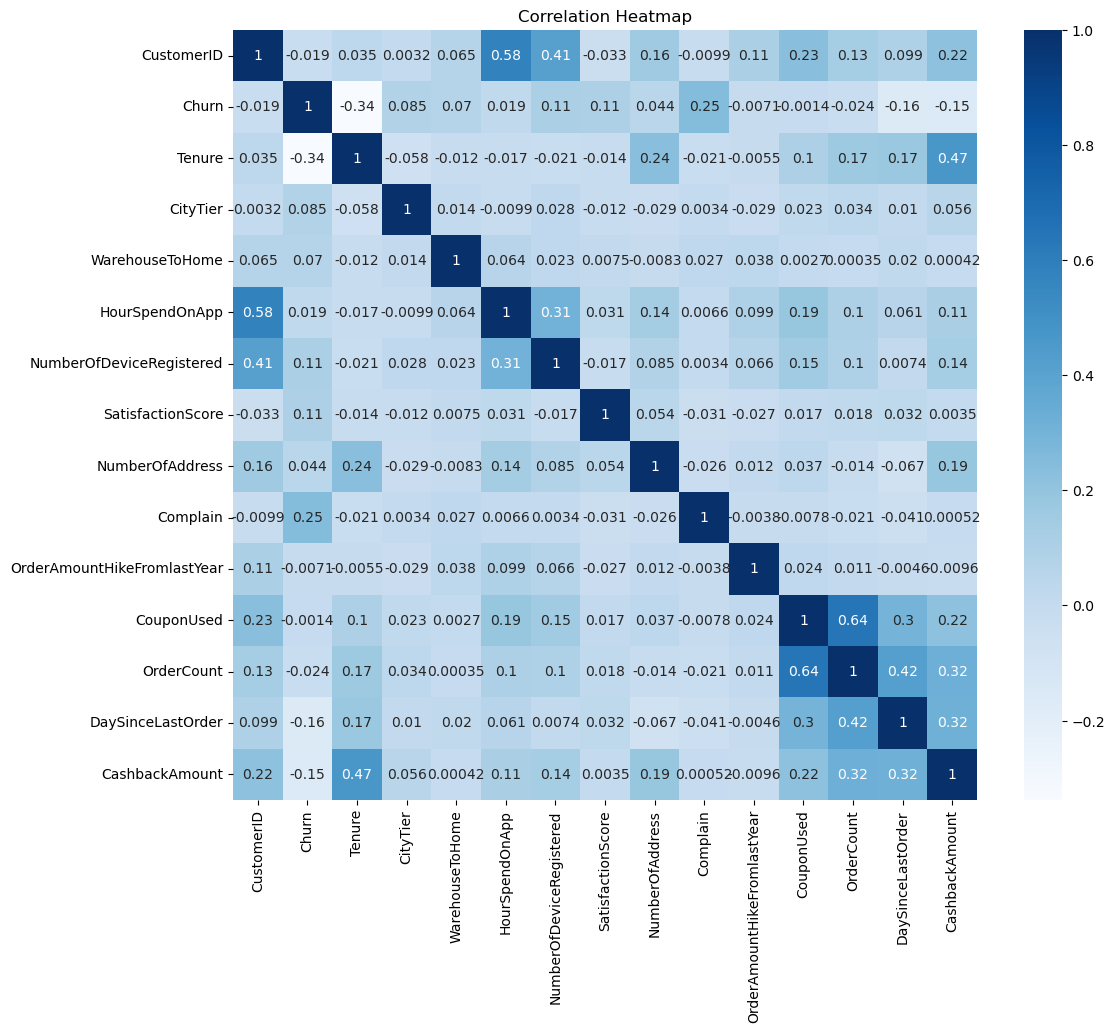

In [9]:
# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

=> We found that there are not any columns that have correlation with "Churn" column

In [10]:
# Convert num_cols to categories
data1 = data.copy()
for col in data1.columns:
  if col == 'CustomerID':
    continue

  else:
    if data1[col].dtype == 'int':
      data1[col] = data[col].astype(str)

data1.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode','Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat','SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

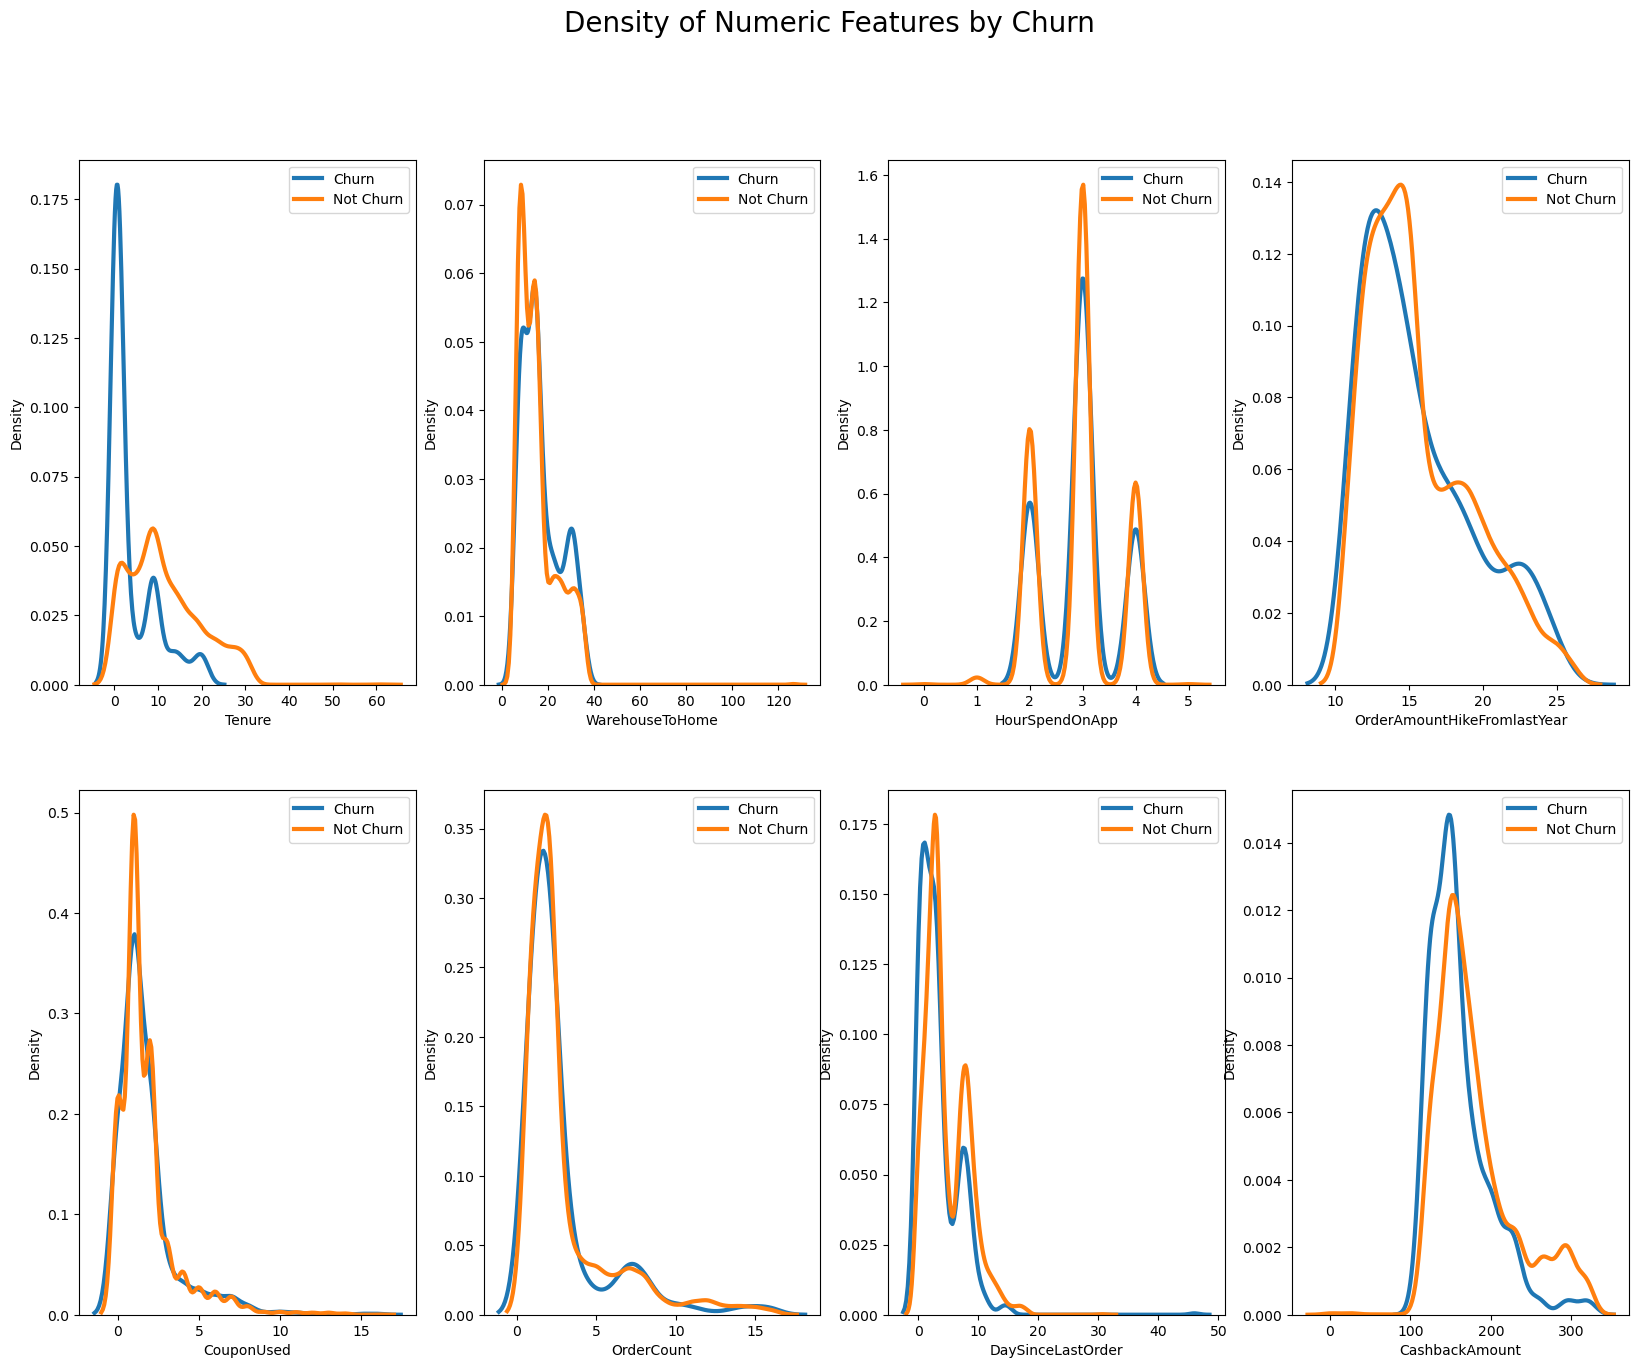

In [12]:
# EDA about numeric features:
df_churn = data[data['Churn']==1].copy()
df_notchurn = data[data['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_churn[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_notchurn[c], linewidth= 3,
             label = 'Not Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

#### Distributions Insights Of the Numeric Features:
- Tenure: Customers with longer tenure seem less likely to churn. Makes sense as longer tenure indicates satisfaction.
- WarehouseToHome: Shorter warehouse to home distances have a lower churn rate. Faster deliveries may improve satisfaction.
- HourSpendOnApp: More time spent on app correlates with lower churn. App engagement is a good sign.
- OrderAmountHikeFromLastYear: Big spenders from last year are less likely to churn. Good to retain big customers.
- CouponUsed: Coupon usage correlates with lower churn. Coupons enhance loyalty.
- OrderCount: Higher order counts associate with lower churn. Frequent usage builds habits.
- DaySinceLastOrder: Longer since last order correlates with higher churn. Recency is a good predictor.
- Cashbackamount: Higher cashback correlates with lower churn. Need more promotion about cashback

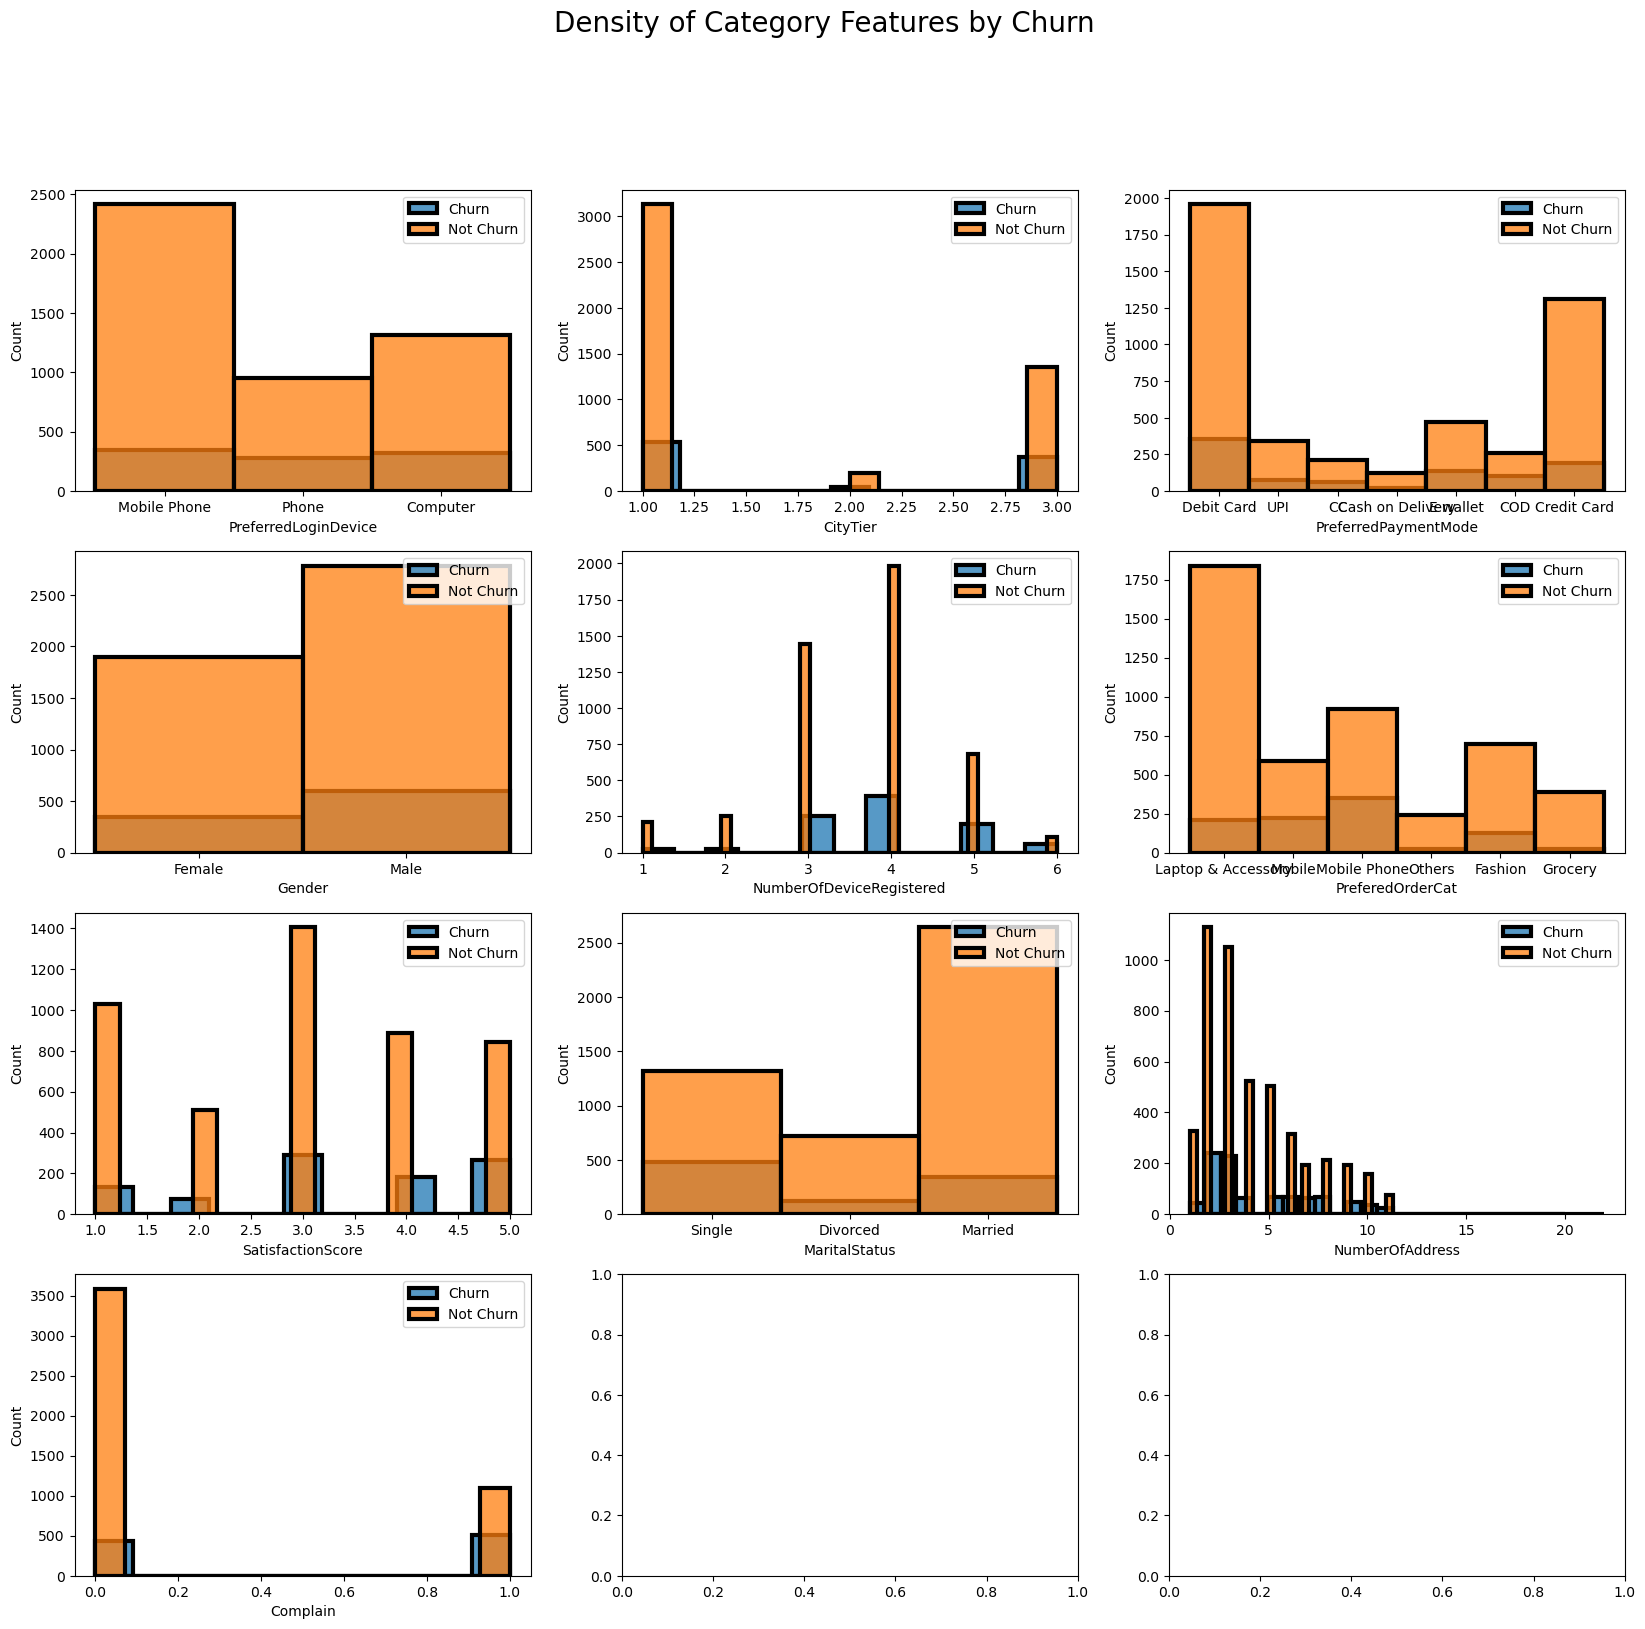

In [13]:
# EDA about category features:
df_churn = data1[data1['Churn']==1].copy()
df_notchurn = data1[data1['Churn']==0].copy()

fig, ax = plt.subplots(4,3,figsize=(20, 18))
fig.suptitle('Density of Category Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(cat_cols):
    sns.histplot(df_churn[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.histplot(df_notchurn[c], linewidth= 3,
             label = 'Not Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

#### Distributions Insights Of the Category Features:
- CityTier: Churn rate looks similar across tiers. City tier does not seem predictive of churn.
- NumberOfDeviceRegistered: More registered devices associates with lower churn. Access across devices improves convenience.
- SatisfactionScore: Higher satisfaction scores strongly associate with lower churn, as expected. Critical driver.
- NumberOfAddress: Slight downward trend in churn as number of addresses increases. More addresses indicates loyalty.
- Complain: More complaints associate with higher churn, though relationship isn't very strong. Complaints hurt satisfaction.

### Define count percentage and visualization:

In [14]:
def count_percentage(data, column, target, count):

    # Create 2 dataframes of churn and not_churn
    churn = data[data[target]==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    not_churn = data[data[target]==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)

    #Merge 2 dataframe into one:
    cate_df = churn.merge(not_churn, on = column , how = 'outer')
    cate_df.rename(columns = {count+'_x':'churn',count+'_y':'not_churn'}, inplace = True)

    #Caculate the percentage:
    cate_df['%'] = cate_df['churn']/(cate_df['churn']+cate_df['not_churn'])

    return cate_df

def cate_visualize(cate_column,churnornot):
    plot_data = data[data['Churn']==churnornot].groupby(cate_column)[['CustomerID']].nunique().reset_index()
    plot_data['%'] = plot_data['CustomerID']/sum(plot_data['CustomerID'])
    fix, ax = plt.subplots(figsize=(10,6))
    sns.barplot(data=plot_data,x=cate_column,y='%',ax=ax)

### Tenure: 

In [15]:
data['Tenure'].unique()

array([ 4.,  9.,  0., 13., 11., 19., 20., 14.,  8., 18.,  5.,  2., 30.,
        1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15., 22.,
       27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

<Axes: xlabel='Tenure', ylabel='CustomerID'>

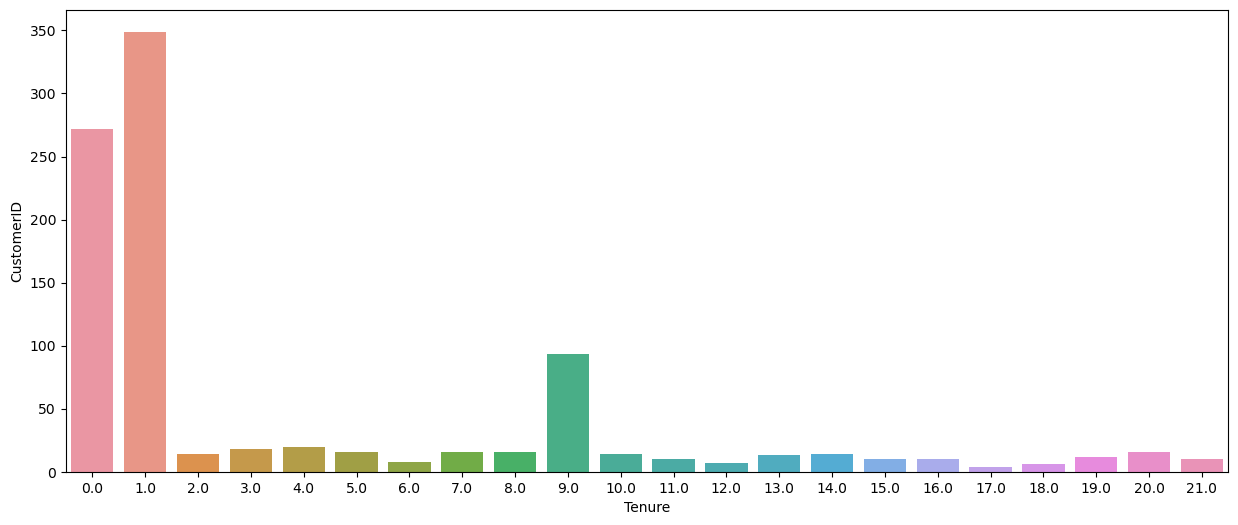

In [16]:
plot_data = data[data['Churn']==1].groupby('Tenure')[['CustomerID']].nunique().reset_index()
fix, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=plot_data,x='Tenure',y='CustomerID',ax=ax)

<Axes: xlabel='Tenure', ylabel='CustomerID'>

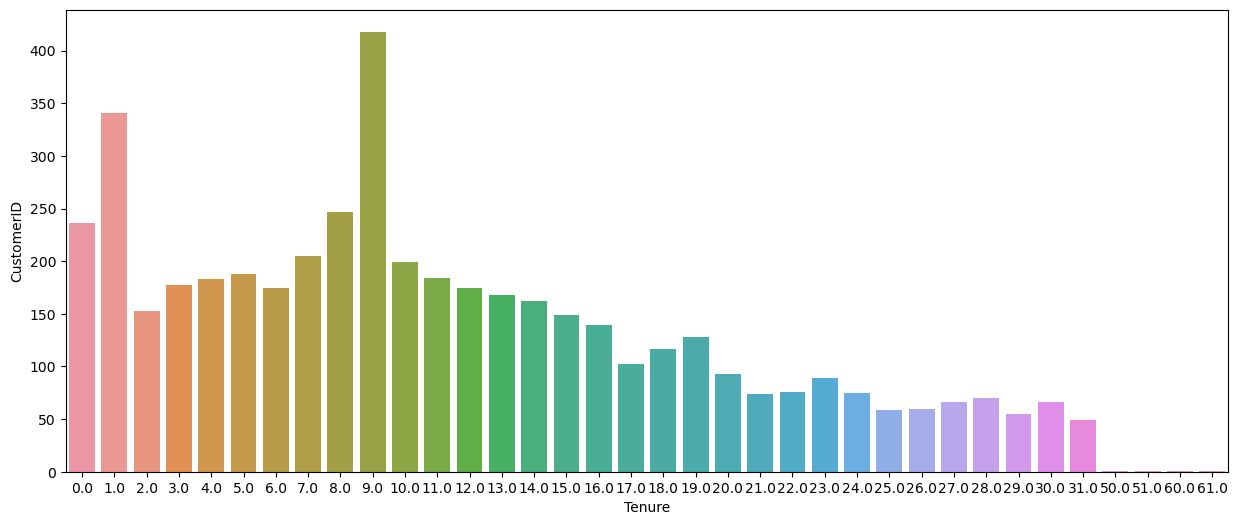

In [17]:
plot_data = data[data['Churn']==0].groupby('Tenure')[['CustomerID']].nunique().reset_index()
fix, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=plot_data,x='Tenure',y='CustomerID',ax=ax)

In [18]:
count_percentage(data,'Tenure','Churn','CustomerID')

,Tenure,churn,not_churn,%
0,1.0,349.0,341,0.505797
1,0.0,272.0,236,0.535433
2,9.0,93.0,418,0.181996
3,4.0,20.0,183,0.098522
4,3.0,18.0,177,0.092308
5,5.0,16.0,188,0.078431
6,20.0,16.0,93,0.146789
7,7.0,16.0,205,0.072398
8,8.0,16.0,247,0.060837
9,2.0,14.0,153,0.083832


#### => Churn users are usually New users

### PreferredLoginDevice:

In [19]:
data['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [20]:
# Replace Phone to Mobile Phone
data['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'},inplace=True)
data['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer'], dtype=object)

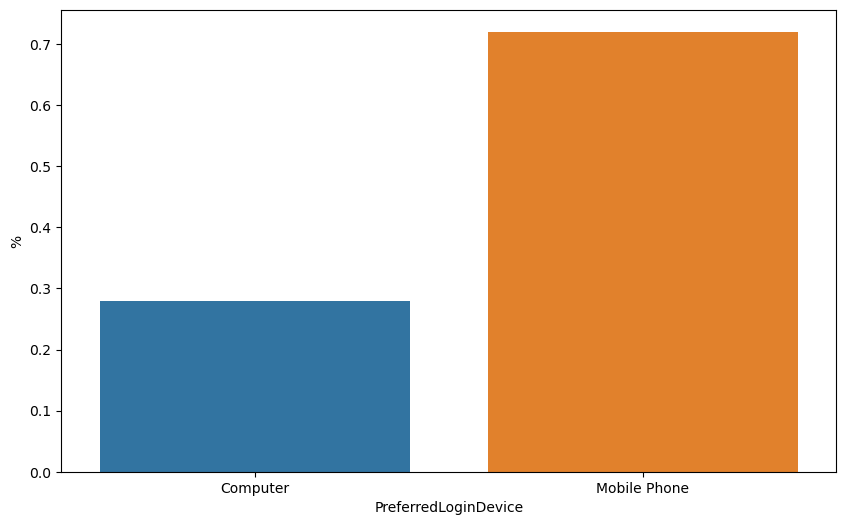

In [21]:
cate_visualize('PreferredLoginDevice',0)

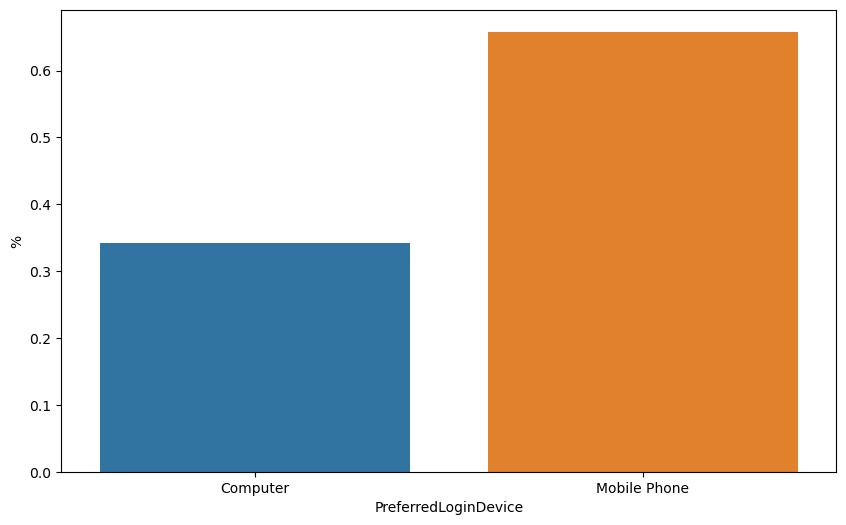

In [22]:
cate_visualize('PreferredLoginDevice',1)

In [23]:
count_percentage(data,'PreferredLoginDevice','Churn','CustomerID')

,PreferredLoginDevice,churn,not_churn,%
0,Mobile Phone,624,3372,0.156156
1,Computer,324,1310,0.198286


#### => Both churn and not churn users tend to use mobile phone

### CityTier:

In [24]:
data['CityTier'].unique()

array([3, 1, 2], dtype=int64)

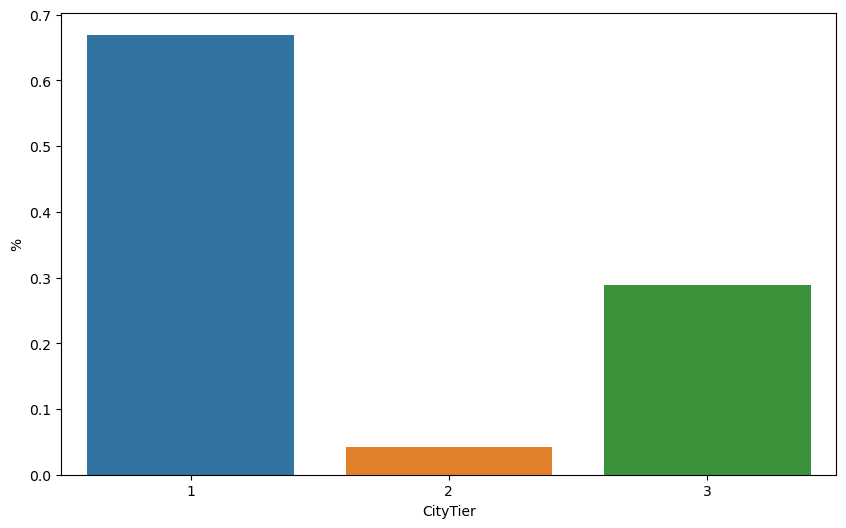

In [25]:
cate_visualize('CityTier',0)

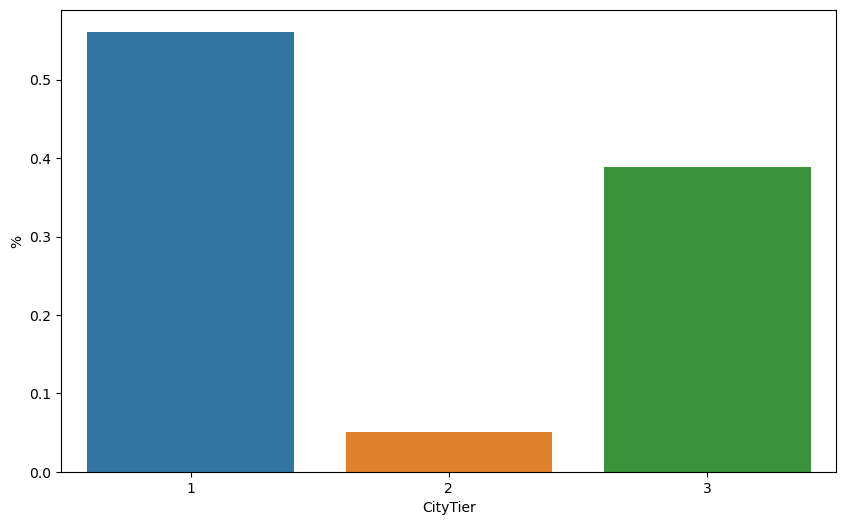

In [26]:
cate_visualize('CityTier',1)

In [27]:
count_percentage(data,'CityTier','Churn','CustomerID')

,CityTier,churn,not_churn,%
0,1,532,3134,0.145117
1,3,368,1354,0.213705
2,2,48,194,0.198347


#### => Both churn and not churn users live in City tier 1 and 3 tend to churn more.

### WarehouseToHome:

<Axes: xlabel='Churn', ylabel='WarehouseToHome'>

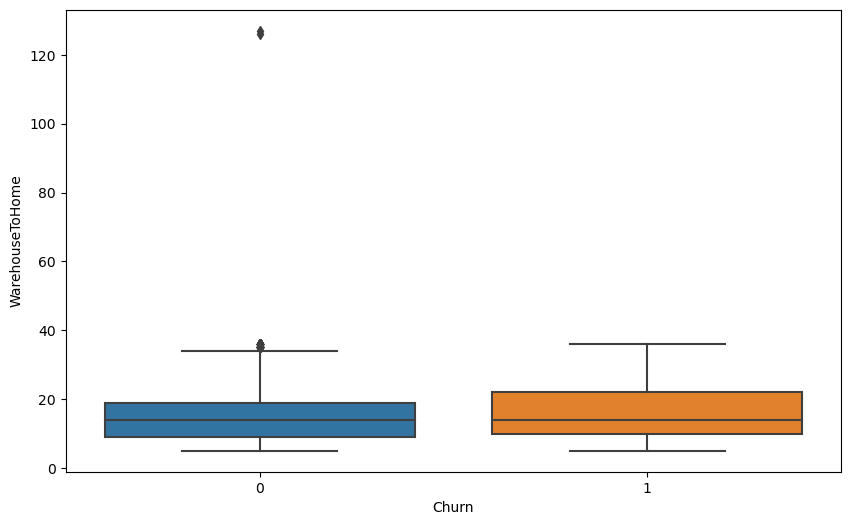

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data, x='Churn',y='WarehouseToHome',ax=ax)

#### => There is not significantly different about Warehouse to Home between churn and not churn users.

### PreferredPaymentMode:

In [29]:
data['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [30]:
# Replace CC=Credit Card; COD=Cash on Delivery:
data['PreferredPaymentMode'].replace({'CC':'Credit Card', 'COD':'Cash on Delivery'}, inplace=True)
data['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

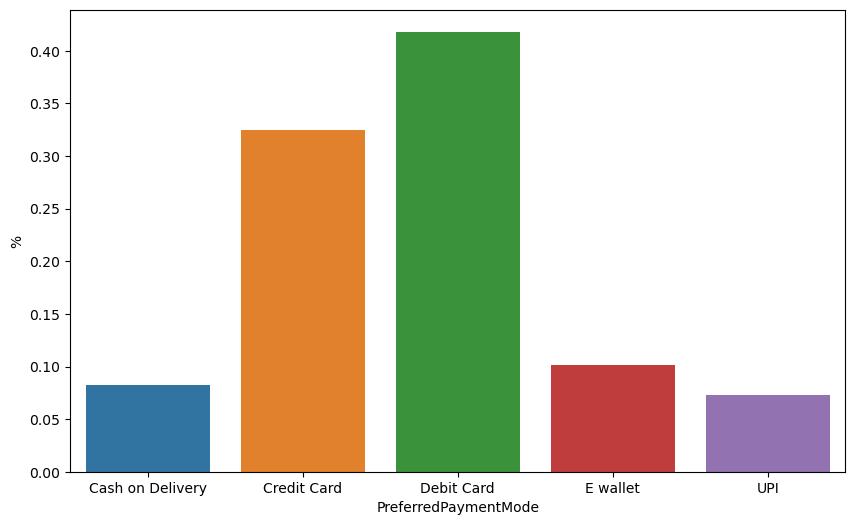

In [31]:
cate_visualize('PreferredPaymentMode',0)

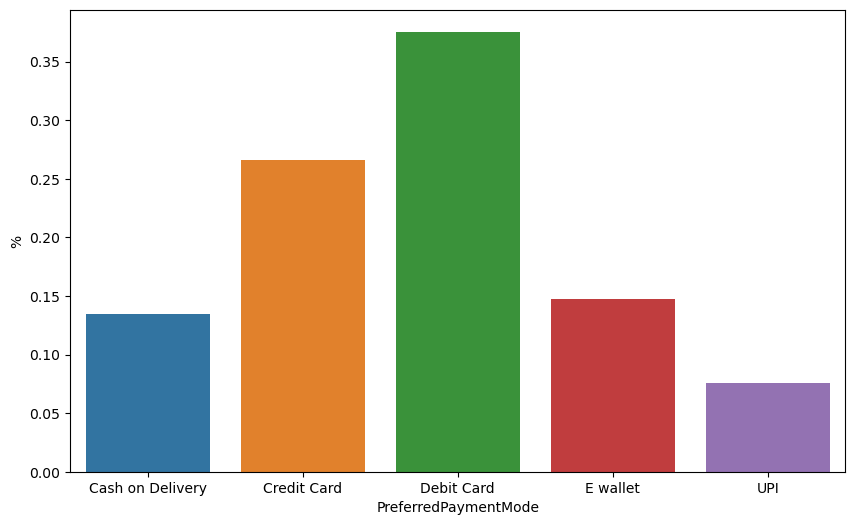

In [32]:
cate_visualize('PreferredPaymentMode',1)

In [33]:
count_percentage(data,'PreferredPaymentMode','Churn','CustomerID')

,PreferredPaymentMode,churn,not_churn,%
0,Debit Card,356,1958,0.153846
1,Credit Card,252,1522,0.142052
2,E wallet,140,474,0.228013
3,Cash on Delivery,128,386,0.249027
4,UPI,72,342,0.173913


#### => There is not significantly different about Preferred Payment Mode between churn and not churn users.

### Gender:

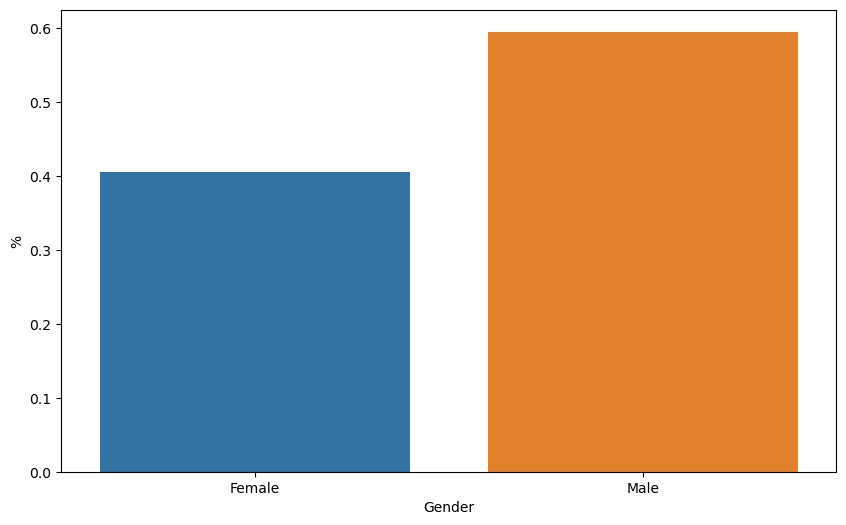

In [34]:
cate_visualize('Gender',0)

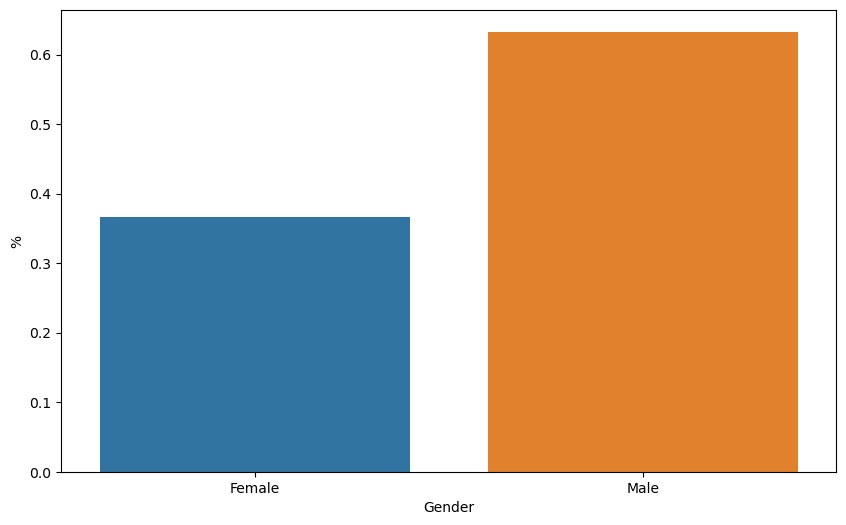

In [35]:
cate_visualize('Gender',1)

In [36]:
count_percentage(data, 'Gender', 'Churn', 'CustomerID')

,Gender,churn,not_churn,%
0,Male,600,2784,0.177305
1,Female,348,1898,0.154942


#### => There is not a big difference between the males and the females

### HourSpendOnApp:

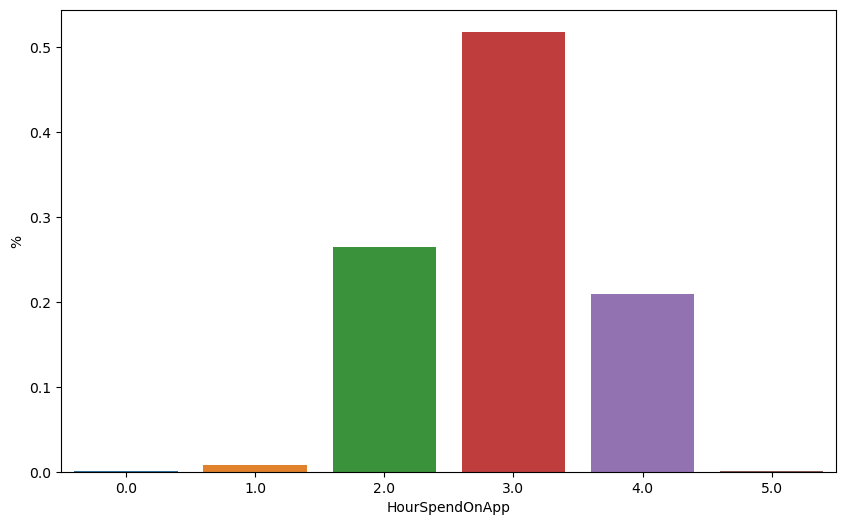

In [37]:
cate_visualize('HourSpendOnApp',0)

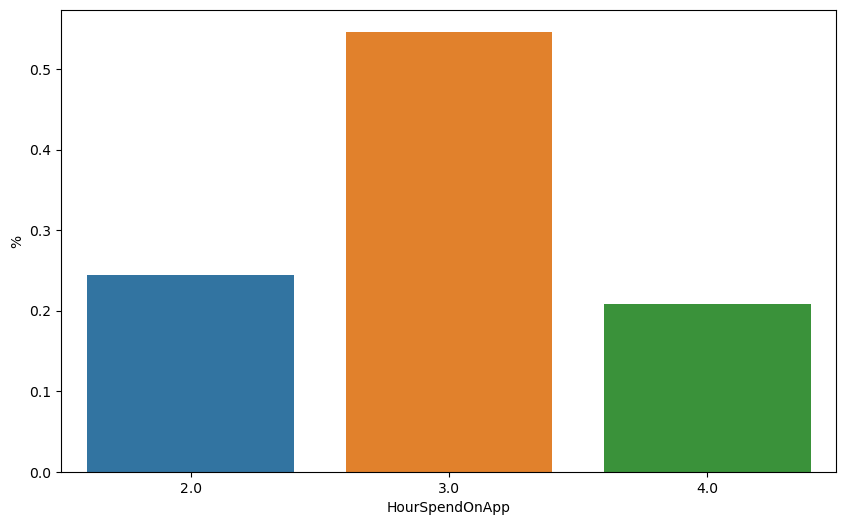

In [38]:
cate_visualize('HourSpendOnApp',1)

In [39]:
count_percentage(data, 'HourSpendOnApp', 'Churn', 'CustomerID')

,HourSpendOnApp,churn,not_churn,%
0,3.0,518.0,2424,0.176071
1,2.0,232.0,1239,0.157716
2,4.0,198.0,978,0.168367
3,1.0,NaN,35,NaN
4,0.0,NaN,3,NaN
5,5.0,NaN,3,NaN


#### => There is not significantly different about Hour Spend On App between churn and not churn users.

### NumberOfDeviceRegistered:

In [40]:
data['NumberOfDeviceRegistered'].unique()

array([3, 4, 5, 2, 1, 6], dtype=int64)

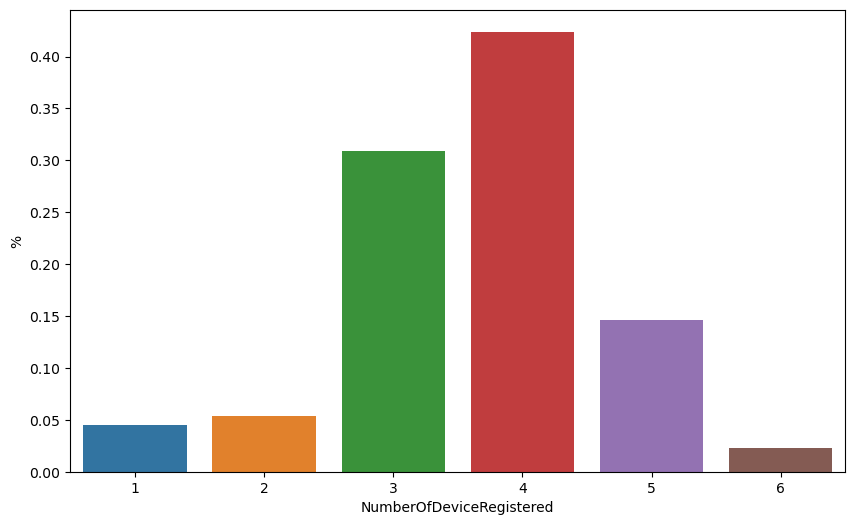

In [41]:
cate_visualize('NumberOfDeviceRegistered',0)

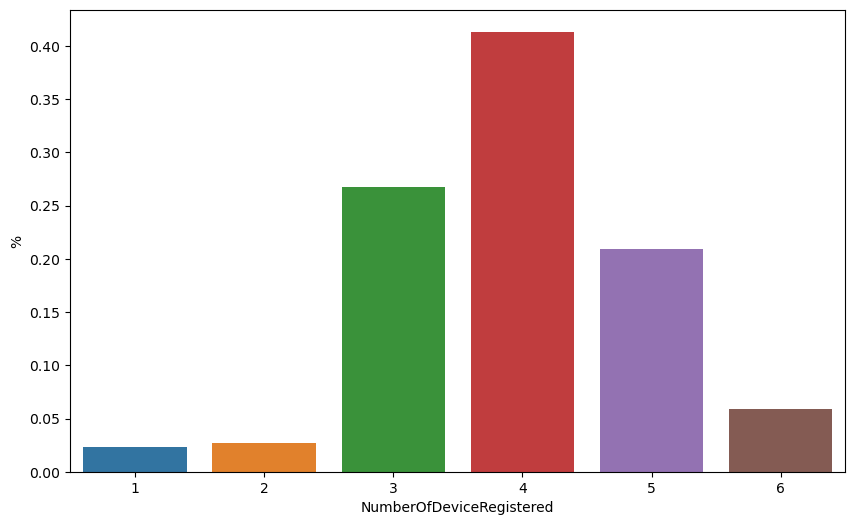

In [42]:
cate_visualize('NumberOfDeviceRegistered',1)

In [43]:
count_percentage(data, 'NumberOfDeviceRegistered', 'Churn', 'CustomerID')

,NumberOfDeviceRegistered,churn,not_churn,%
0,4,392,1985,0.164914
1,3,254,1445,0.149500
2,5,198,683,0.224745
3,6,56,106,0.345679
4,2,26,250,0.094203
5,1,22,213,0.093617


#### => Users using more devices tend to be churn users.

### PreferedOrderCat:

In [44]:
data['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [45]:
# Replace Mobile=Mobile phone:
data['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'},inplace=True)
data['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Grocery'], dtype=object)

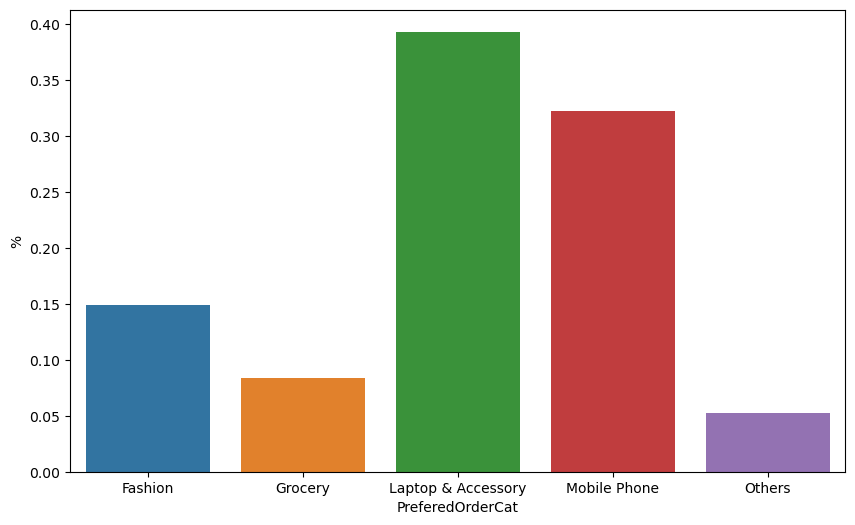

In [46]:
cate_visualize('PreferedOrderCat',0)

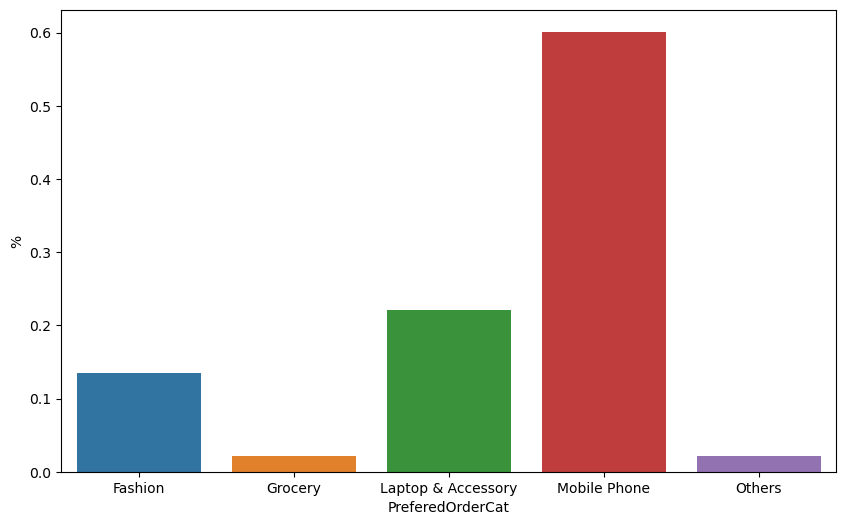

In [47]:
cate_visualize('PreferedOrderCat',1)

In [48]:
count_percentage(data, 'PreferedOrderCat', 'Churn', 'CustomerID')

,PreferedOrderCat,churn,not_churn,%
0,Mobile Phone,570,1510,0.274038
1,Laptop & Accessory,210,1840,0.102439
2,Fashion,128,698,0.154964
3,Grocery,20,390,0.048780
4,Others,20,244,0.075758


#### => Churn users prefer to buy Mobile Phone than not churn users.

### SatisfactionScore:

In [49]:
data['SatisfactionScore'].unique()

array([2, 3, 5, 4, 1], dtype=int64)

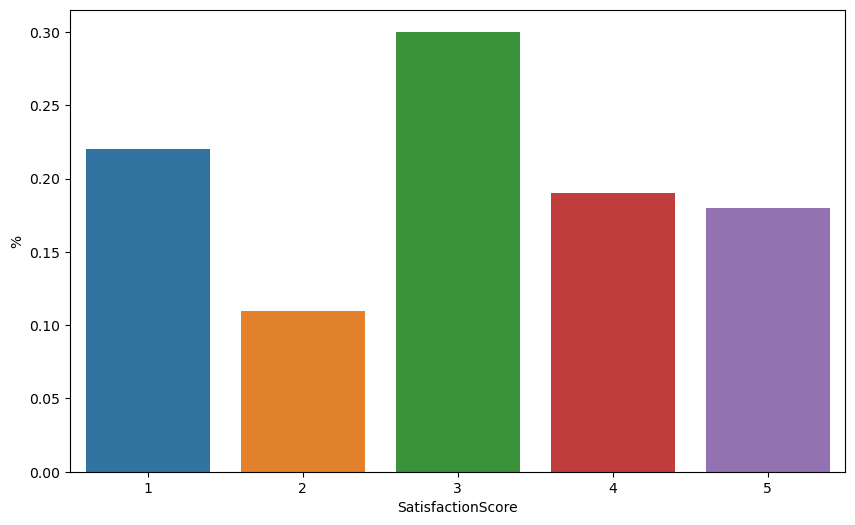

In [50]:
cate_visualize('SatisfactionScore',0)

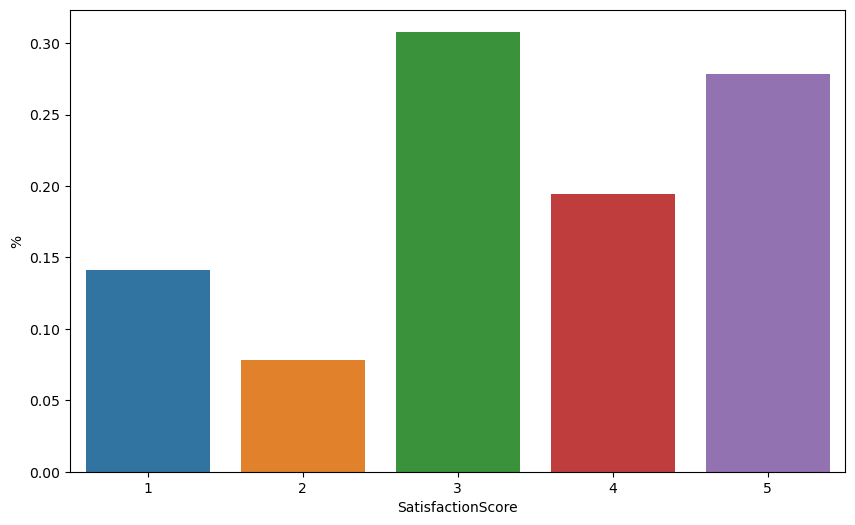

In [51]:
cate_visualize('SatisfactionScore',1)

In [52]:
count_percentage(data, 'SatisfactionScore', 'Churn', 'CustomerID')

,SatisfactionScore,churn,not_churn,%
0,3,292,1406,0.171967
1,5,264,844,0.238267
2,4,184,890,0.171322
3,1,134,1030,0.115120
4,2,74,512,0.126280


#### =>  There is not significantly different about Satisfaction Score between churn and not churn users.

### MaritalStatus:

In [53]:
data['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

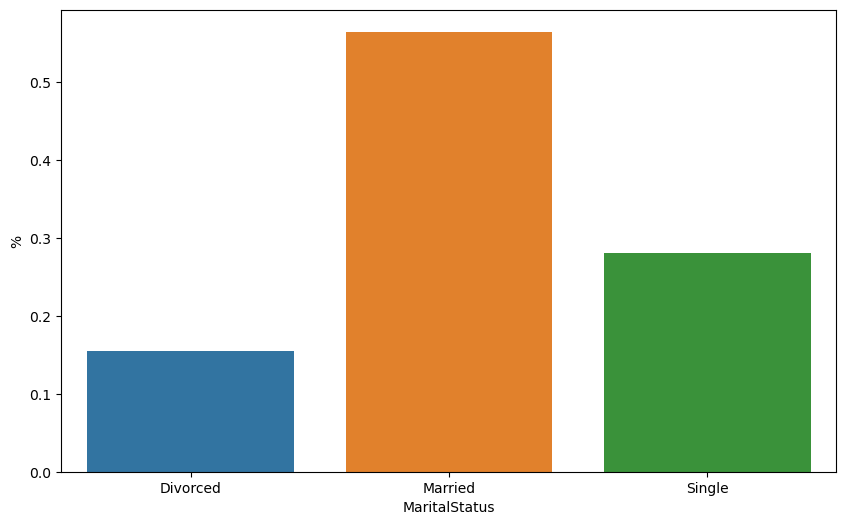

In [54]:
cate_visualize('MaritalStatus',0)

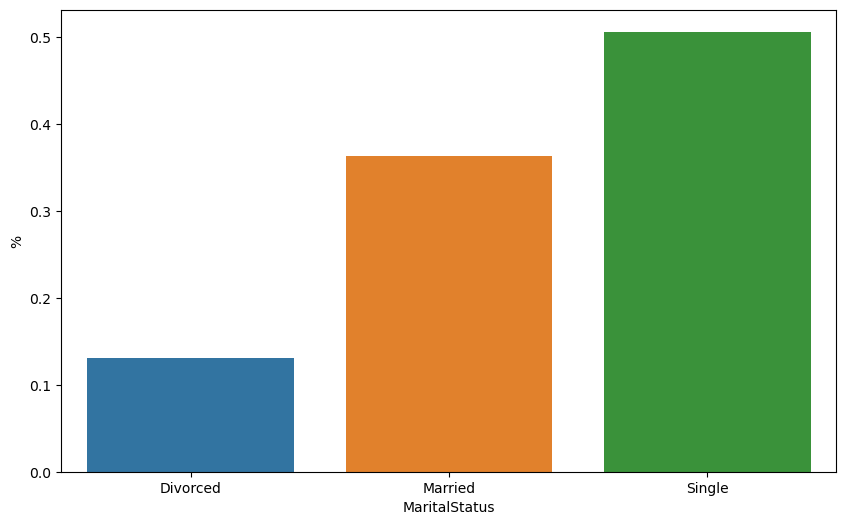

In [55]:
cate_visualize('MaritalStatus',1)

In [56]:
count_percentage(data, 'MaritalStatus', 'Churn', 'CustomerID')

,MaritalStatus,churn,not_churn,%
0,Single,480,1316,0.267261
1,Married,344,2642,0.115204
2,Divorced,124,724,0.146226


#### => Users have single status that tend to be churn users.

### NumberOfAddress:

In [57]:
data['NumberOfAddress'].unique()

array([ 9,  7,  6,  8,  3,  2,  4, 10,  1,  5, 19, 21, 11, 20, 22],
      dtype=int64)

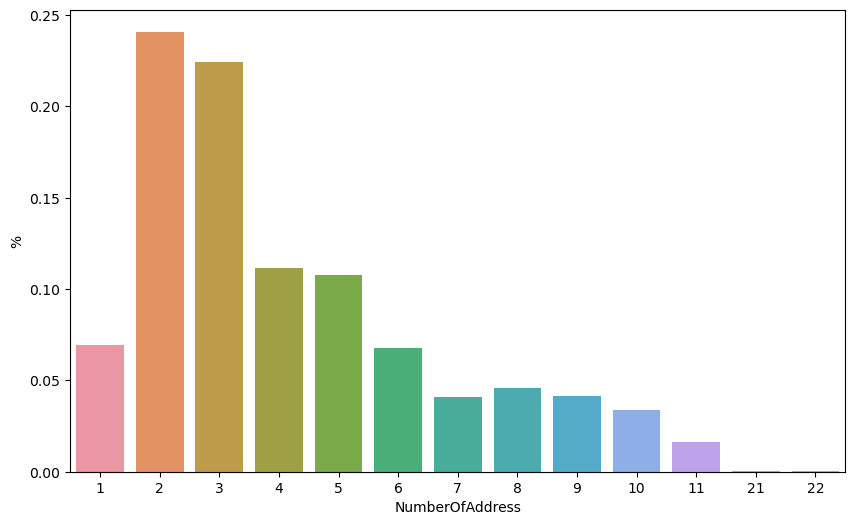

In [58]:
cate_visualize('NumberOfAddress',0)

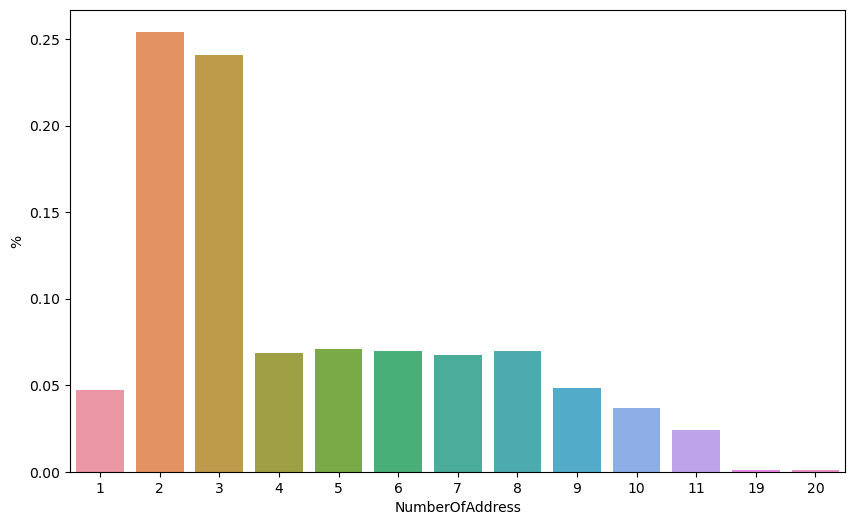

In [59]:
cate_visualize('NumberOfAddress',1)

In [60]:
count_percentage(data, 'NumberOfAddress', 'Churn', 'CustomerID')

,NumberOfAddress,churn,not_churn,%
0,2,241.0,1128.0,0.176041
1,3,228.0,1050.0,0.178404
2,5,67.0,504.0,0.117338
3,6,66.0,316.0,0.172775
4,8,66.0,214.0,0.235714
5,4,65.0,523.0,0.110544
6,7,64.0,192.0,0.250000
7,9,46.0,193.0,0.192469
8,1,45.0,326.0,0.121294
9,10,35.0,159.0,0.180412


#### => There is not significantly different about Number Of Address between churn and not churn users.

### Complain:

In [61]:
data['Complain'].unique()

array([1, 0], dtype=int64)

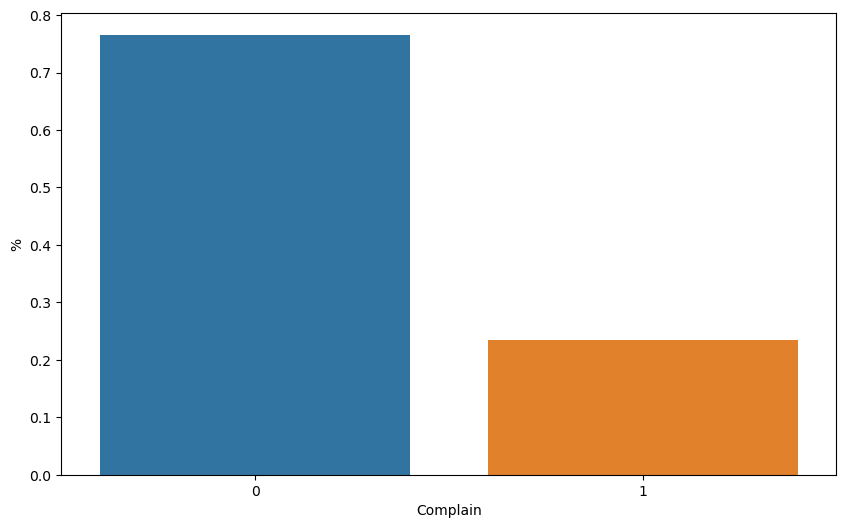

In [62]:
cate_visualize('Complain',0)

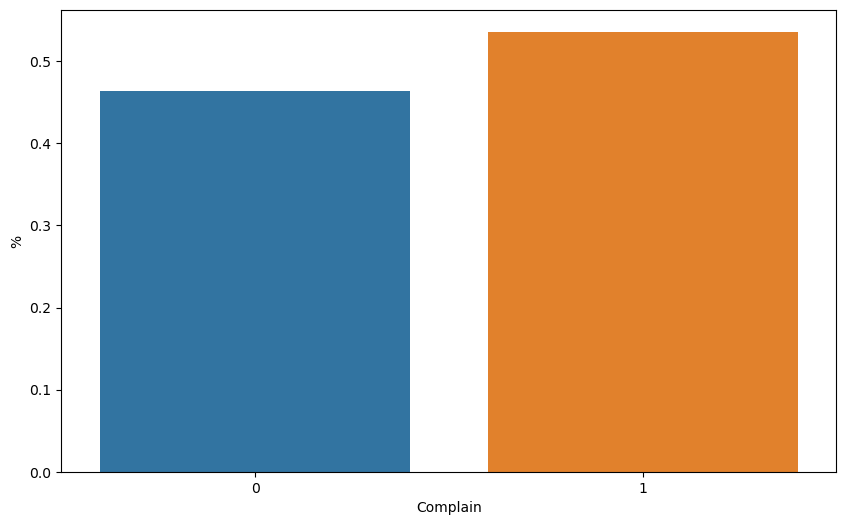

In [63]:
cate_visualize('Complain',1)

In [64]:
count_percentage(data, 'Complain', 'Churn', 'CustomerID')

,Complain,churn,not_churn,%
0,1,508,1096,0.316708
1,0,440,3586,0.109290


#### => Churn users tend to have more complaints.

### Order Amount Hike From Last Year:

In [65]:
data['OrderAmountHikeFromlastYear'].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26.])

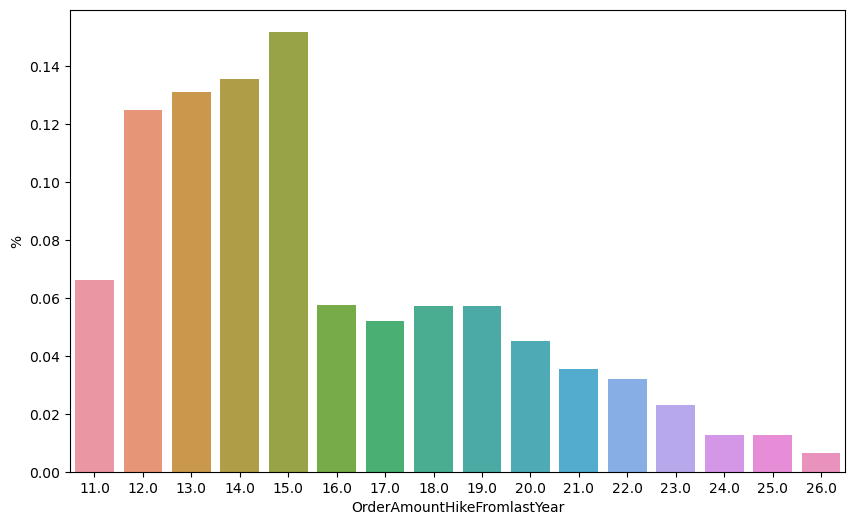

In [66]:
cate_visualize('OrderAmountHikeFromlastYear',0)

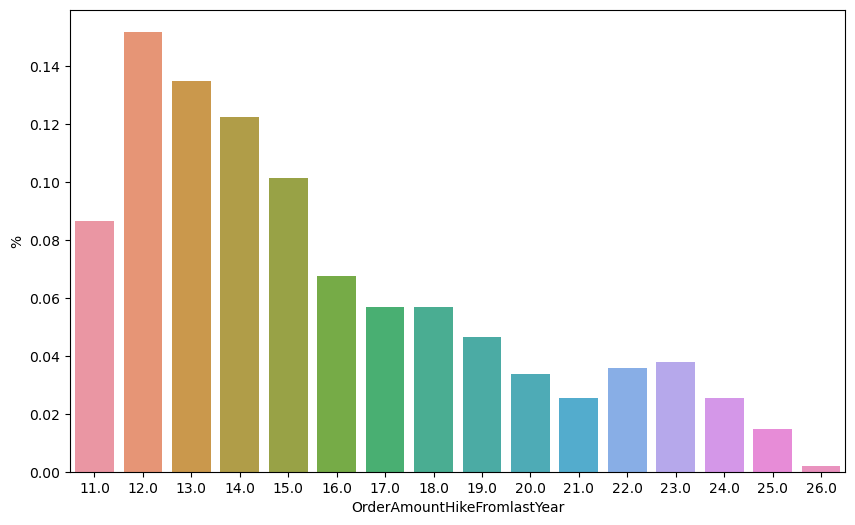

In [67]:
cate_visualize('OrderAmountHikeFromlastYear',1)

In [68]:
count_percentage(data, 'OrderAmountHikeFromlastYear', 'Churn', 'CustomerID')

,OrderAmountHikeFromlastYear,churn,not_churn,%
0,12.0,144,584,0.197802
1,13.0,128,613,0.172740
2,14.0,116,634,0.154667
3,15.0,96,711,0.118959
4,11.0,82,309,0.209719
5,16.0,64,269,0.192192
6,17.0,54,243,0.181818
7,18.0,54,267,0.168224
8,19.0,44,267,0.141479
9,23.0,36,108,0.250000


#### => There is not significantly different about Order Amount Hike From last Year between churn and not churn users.

### Coupon Used:

In [69]:
data['CouponUsed'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., 14., 16.])

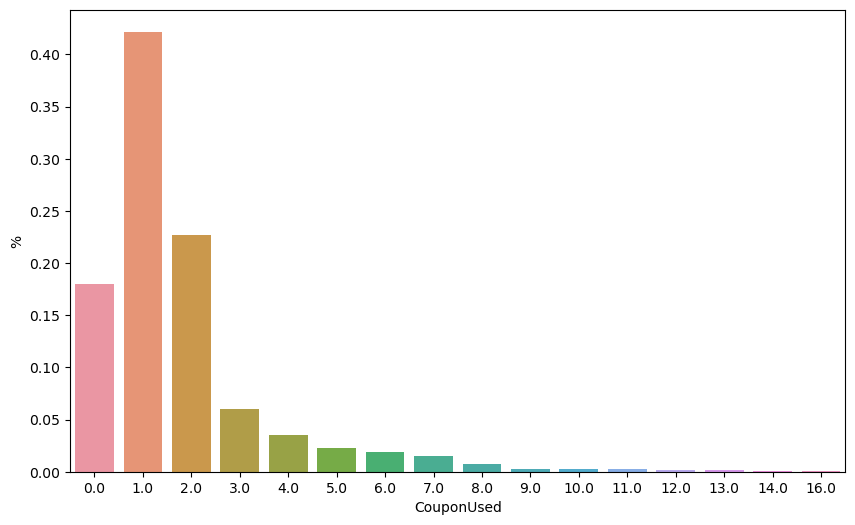

In [70]:
cate_visualize('CouponUsed',0)

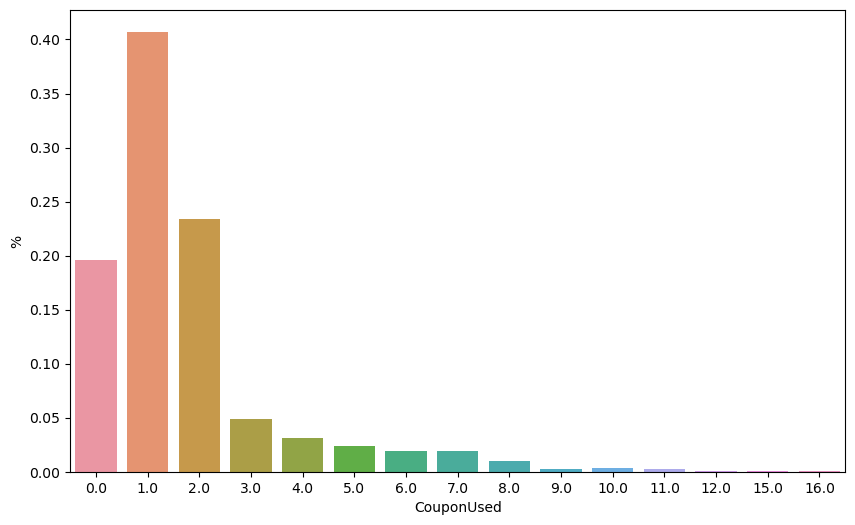

In [71]:
cate_visualize('CouponUsed',1)

In [72]:
count_percentage(data, 'CouponUsed', 'Churn', 'CustomerID')

,CouponUsed,churn,not_churn,%
0,1.0,386.0,1975.0,0.163490
1,2.0,222.0,1061.0,0.173032
2,0.0,186.0,844.0,0.180583
3,3.0,46.0,281.0,0.140673
4,4.0,30.0,167.0,0.152284
5,5.0,23.0,106.0,0.178295
6,6.0,18.0,90.0,0.166667
7,7.0,18.0,71.0,0.202247
8,8.0,9.0,33.0,0.214286
9,10.0,3.0,11.0,0.214286


#### => There is not significantly different about Coupon used between churn and not churn users.

### OrderCount:

In [73]:
data['OrderCount'].unique()

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., 11.,  5., 12., 10.,  8.,
       13., 14., 16.])

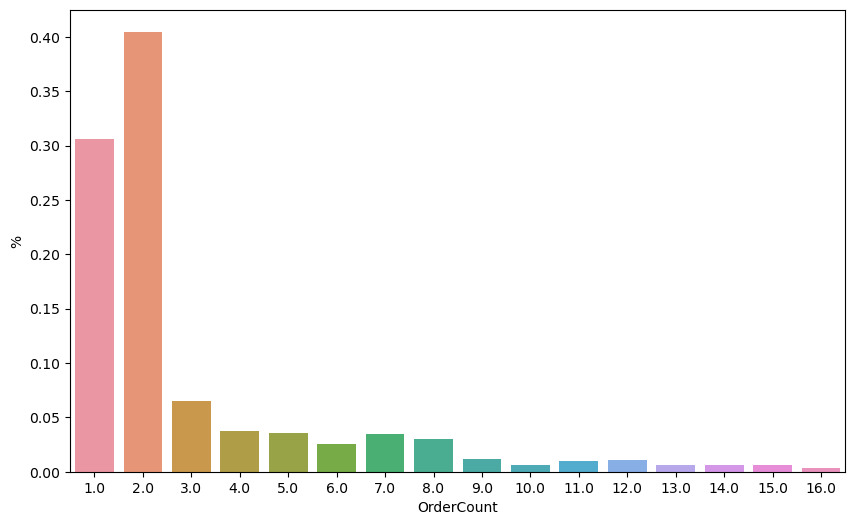

In [74]:
cate_visualize('OrderCount',0)

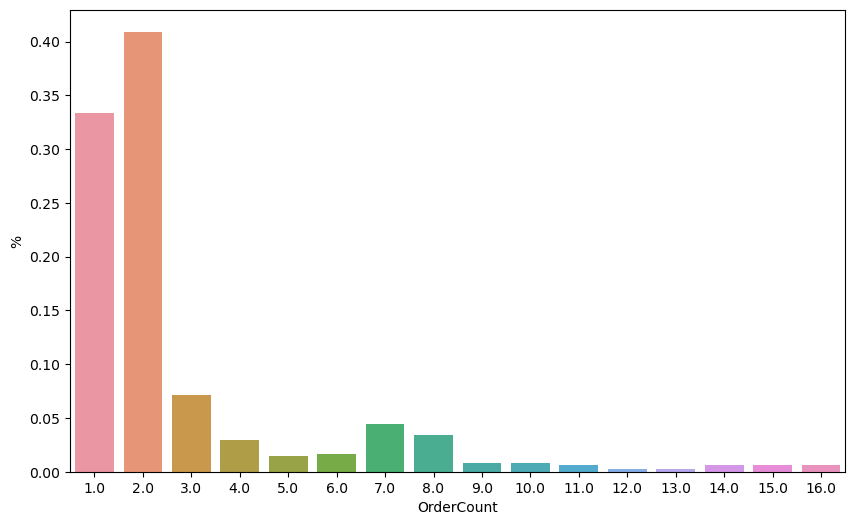

In [75]:
cate_visualize('OrderCount',1)

In [76]:
count_percentage(data, 'OrderCount', 'Churn', 'CustomerID')

,OrderCount,churn,not_churn,%
0,2.0,388,1895,0.169952
1,1.0,316,1435,0.180468
2,3.0,68,303,0.183288
3,7.0,42,164,0.203883
4,8.0,32,140,0.186047
5,4.0,28,176,0.137255
6,6.0,16,121,0.116788
7,5.0,14,167,0.077348
8,9.0,8,54,0.129032
9,10.0,8,28,0.222222


#### => There is not significantly different about Ordercount between churn and not churn users.

### DaySinceLastOrder:

In [77]:
data['DaySinceLastOrder'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       13., 12., 17., 16., 14., 30., 46., 18., 31.])

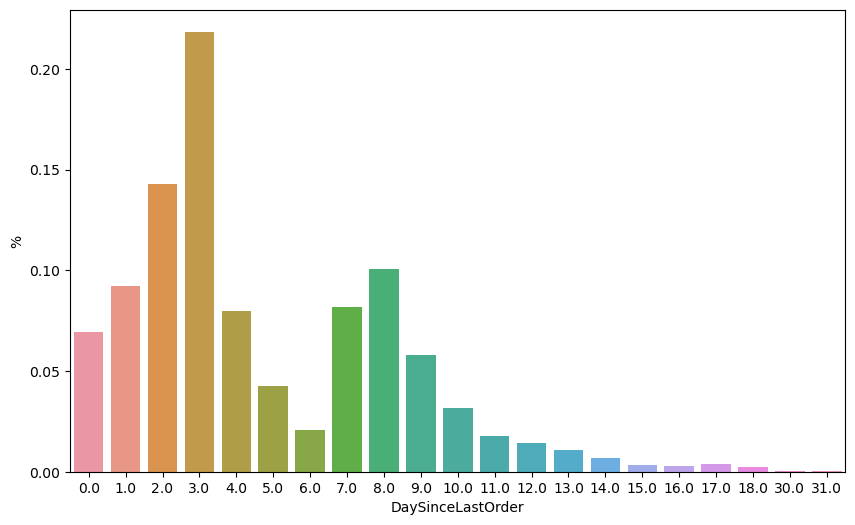

In [78]:
cate_visualize('DaySinceLastOrder',0)

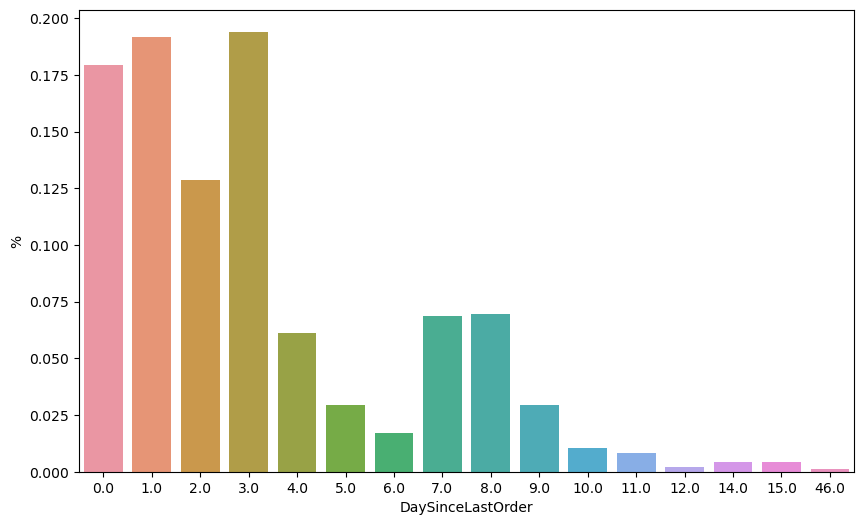

In [79]:
cate_visualize('DaySinceLastOrder',1)

In [80]:
count_percentage(data, 'DaySinceLastOrder', 'Churn', 'CustomerID')

,DaySinceLastOrder,churn,not_churn,%
0,3.0,184.0,1023.0,0.152444
1,1.0,182.0,432.0,0.296417
2,0.0,170.0,326.0,0.342742
3,2.0,122.0,670.0,0.154040
4,8.0,66.0,472.0,0.122677
5,7.0,65.0,382.0,0.145414
6,4.0,58.0,373.0,0.134571
7,5.0,28.0,200.0,0.122807
8,9.0,28.0,271.0,0.093645
9,6.0,16.0,97.0,0.141593


#### => There is not significantly different about Day Since Last Order between churn and not churn users.

### CashbackAmount:

In [81]:
data['CashbackAmount'].unique()

array([159.93, 120.9 , 120.28, ..., 173.77, 287.91, 173.78])

<Axes: xlabel='Churn', ylabel='CashbackAmount'>

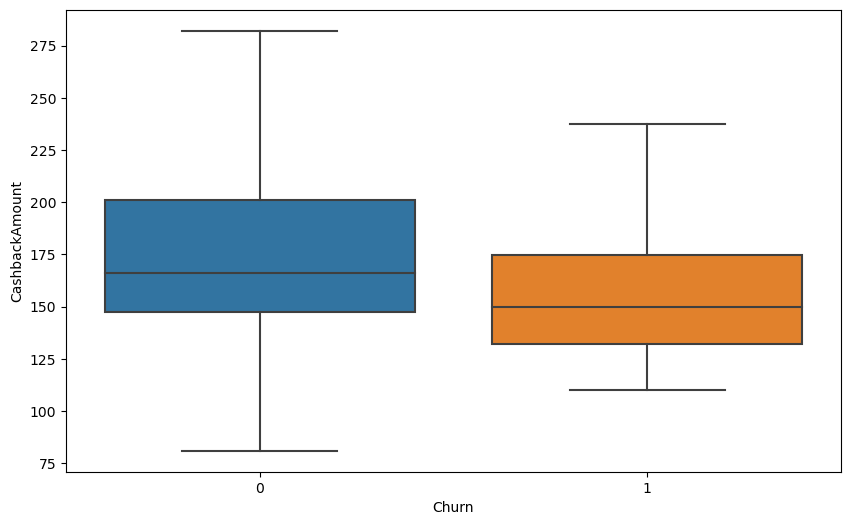

In [82]:
fix, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=data, x='Churn',y='CashbackAmount', showfliers=False)

#### => Churn users receive less cashback amout than not churn users.

### Conclusion:
After EDA, we can keep the below columns to the model:
- Tenure
- PreferredLoginDevice
- CityTier
- NumberOfDeviceRegistered
- PreferedOrderCat
- MaritalStatus
- Complain
- CouponUsed
- CashbackAmount

# Encoding & Normalizing:

In [83]:
data_model= data[['Churn','Tenure','PreferredLoginDevice', 'CityTier','NumberOfDeviceRegistered','PreferedOrderCat', 'MaritalStatus','Complain','CouponUsed', 'CashbackAmount']]
data_model

,Churn,Tenure,PreferredLoginDevice,CityTier,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,Complain,CouponUsed,CashbackAmount
0,1,4.0,Mobile Phone,3,3,Laptop & Accessory,Single,1,1.0,159.93
1,1,9.0,Mobile Phone,1,4,Mobile Phone,Single,1,0.0,120.90
2,1,9.0,Mobile Phone,1,4,Mobile Phone,Single,1,0.0,120.28
3,1,0.0,Mobile Phone,3,4,Laptop & Accessory,Single,0,0.0,134.07
4,1,0.0,Mobile Phone,1,3,Mobile Phone,Single,0,1.0,129.60
...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,2,Laptop & Accessory,Married,0,1.0,150.71
5626,0,13.0,Mobile Phone,1,5,Fashion,Married,0,1.0,224.91
5627,0,1.0,Mobile Phone,1,2,Laptop & Accessory,Married,1,1.0,186.42
5628,0,23.0,Computer,3,5,Laptop & Accessory,Married,0,2.0,178.90


In [84]:
list_columns = ['PreferredLoginDevice','CityTier','PreferedOrderCat','MaritalStatus']
data_model = pd.get_dummies(data_model, columns = list_columns)
data_model

,Churn,Tenure,NumberOfDeviceRegistered,Complain,CouponUsed,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,CityTier_1,CityTier_2,CityTier_3,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,1,1.0,159.93,0,1,0,0,1,0,0,1,0,0,0,0,1
1,1,9.0,4,1,0.0,120.90,0,1,1,0,0,0,0,0,1,0,0,0,1
2,1,9.0,4,1,0.0,120.28,0,1,1,0,0,0,0,0,1,0,0,0,1
3,1,0.0,4,0,0.0,134.07,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1,0.0,3,0,1.0,129.60,0,1,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,2,0,1.0,150.71,1,0,1,0,0,0,0,1,0,0,0,1,0
5626,0,13.0,5,0,1.0,224.91,0,1,1,0,0,1,0,0,0,0,0,1,0
5627,0,1.0,2,1,1.0,186.42,0,1,1,0,0,0,0,1,0,0,0,1,0
5628,0,23.0,5,0,2.0,178.90,1,0,0,0,1,0,0,1,0,0,0,1,0


In [85]:
list_columns = data_model.columns.tolist()

from sklearn.preprocessing import MinMaxScaler

filter_data = data_model[list_columns]
scaler = MinMaxScaler()
model=scaler.fit(filter_data)
scaled_data=model.transform(filter_data)

data_model = pd.DataFrame(scaled_data, columns = list_columns)

data_model

,Churn,Tenure,NumberOfDeviceRegistered,Complain,CouponUsed,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,CityTier_1,CityTier_2,CityTier_3,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.065574,0.4,1.0,0.0625,0.492107,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.147541,0.6,1.0,0.0000,0.372011,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.147541,0.6,1.0,0.0000,0.370104,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.000000,0.6,0.0,0.0000,0.412536,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,0.4,0.0,0.0625,0.398782,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.163934,0.2,0.0,0.0625,0.463737,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5626,0.0,0.213115,0.8,0.0,0.0625,0.692052,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.0,0.016393,0.2,1.0,0.0625,0.573618,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5628,0.0,0.377049,0.8,0.0,0.1250,0.550478,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Split data:

In [86]:
from sklearn.model_selection import train_test_split
x=data_model.drop('Churn', axis = 1)
y=data_model[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [87]:
# Rb = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Apply model:

## Model: Logistic Regression:

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
clf_log = LogisticRegression()
clf_log.fit(x_train, y_train)
# rf_clf = RandomForestClassifier()

LogisticRegression()

In [90]:
y_pred_test = clf_log.predict(x_test)
y_pred_train = clf_log.predict(x_train)

In [91]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)
print('Balanced accuracy train:', balanced_accuracy_train)
print('Balanced accuracy test:', balanced_accuracy_test)

Balanced accuracy train: 0.6707636844105842
Balanced accuracy test: 0.6545428828597145


## Model: Decision Tree:

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
clf_dec = DecisionTreeClassifier()
clf_dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [94]:
y_pred_tree_test = clf_dec.predict(x_test)
y_pred_tree_train = clf_dec.predict(x_train)

In [95]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_tree_train)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_tree_test)
print('Balanced accuracy train:', balanced_accuracy_train)
print('Balanced accuracy test:', balanced_accuracy_test)

Balanced accuracy train: 1.0
Balanced accuracy test: 0.8424701041532725


## Model: Random Forest:

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
clf_ran = DecisionTreeClassifier()
clf_ran.fit(x_train, y_train)

DecisionTreeClassifier()

In [98]:
y_pred_ran_test = clf_ran.predict(x_test)
y_pred_ran_train = clf_ran.predict(x_train)

In [99]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_ran_train)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_ran_test)
print('Balanced accuracy train:', balanced_accuracy_train)
print('Balanced accuracy test:', balanced_accuracy_test)

Balanced accuracy train: 1.0
Balanced accuracy test: 0.8533290471904333


### => Choose the best model: Random Forest Model with highest accuracy both train and test data

# Enhanced Random Forest model:

### Show the feature importances:

In [100]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_test.columns, clf_ran.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

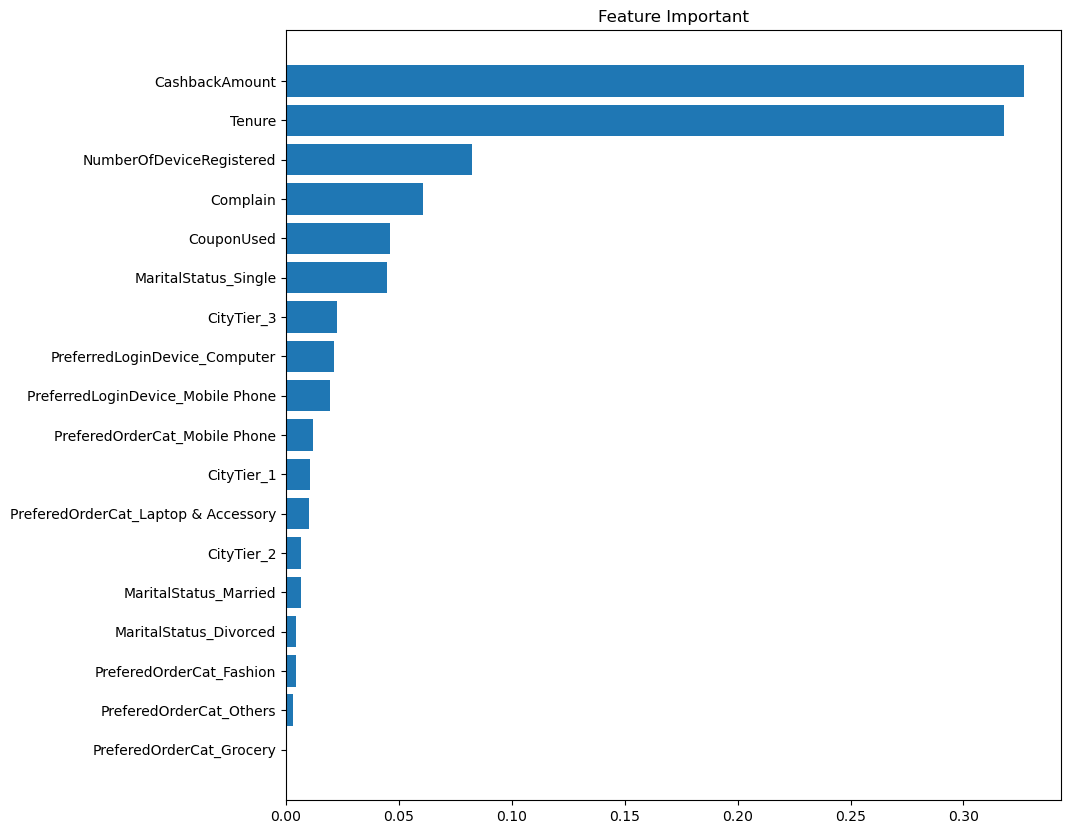

In [101]:
# Visualize:
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

### => 2 features that impact to churn users most are Cashback Amount and Tenure